In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Prepare data set for the model

In [2]:
X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=10,random_state=123)


In [3]:
#convert numpy data to pytorch tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [4]:
X.shape,y.shape

(torch.Size([100, 1]), torch.Size([100]))

In [5]:
#reshape y as a column vector
y = y.view(y.shape[0],1)

In [6]:
y.shape

torch.Size([100, 1])

In [7]:
n_samples, n_features = X.shape

model

In [8]:
input_size = n_features
output_size = n_features
model = nn.Linear(input_size,output_size)

Loss function and optimizer

In [9]:
learning_rate = 0.01
criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Training loop

In [10]:
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_pred = model(X)
  loss = criteria(y_pred, y)

  #backward autograd
  loss.backward()

  #update the weight
  optimizer.step()

  #set the autograd to zero
  optimizer.zero_grad()

  if (epoch+1)%10 == 0:
    print(f"Epoch:{epoch+1},Loss:{loss.item():.4f}")




Epoch:10,Loss:1015.1766
Epoch:20,Loss:642.0725
Epoch:30,Loss:419.3336
Epoch:40,Loss:286.3402
Epoch:50,Loss:206.9184
Epoch:60,Loss:159.4798
Epoch:70,Loss:131.1384
Epoch:80,Loss:114.2024
Epoch:90,Loss:104.0790
Epoch:100,Loss:98.0262


Plot the raw dataset and the predicted results from the linear regression model

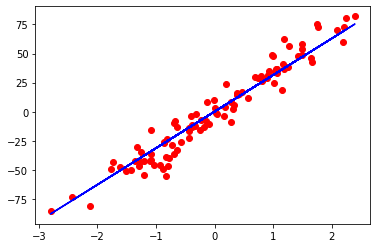

In [11]:
predicted = model(X).detach()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')